# Домашнее задание по теме «Временные ряды, общая теория»
Проанализируйте ряды и сделайте их стационарными.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

# Отображение графиков

In [3]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

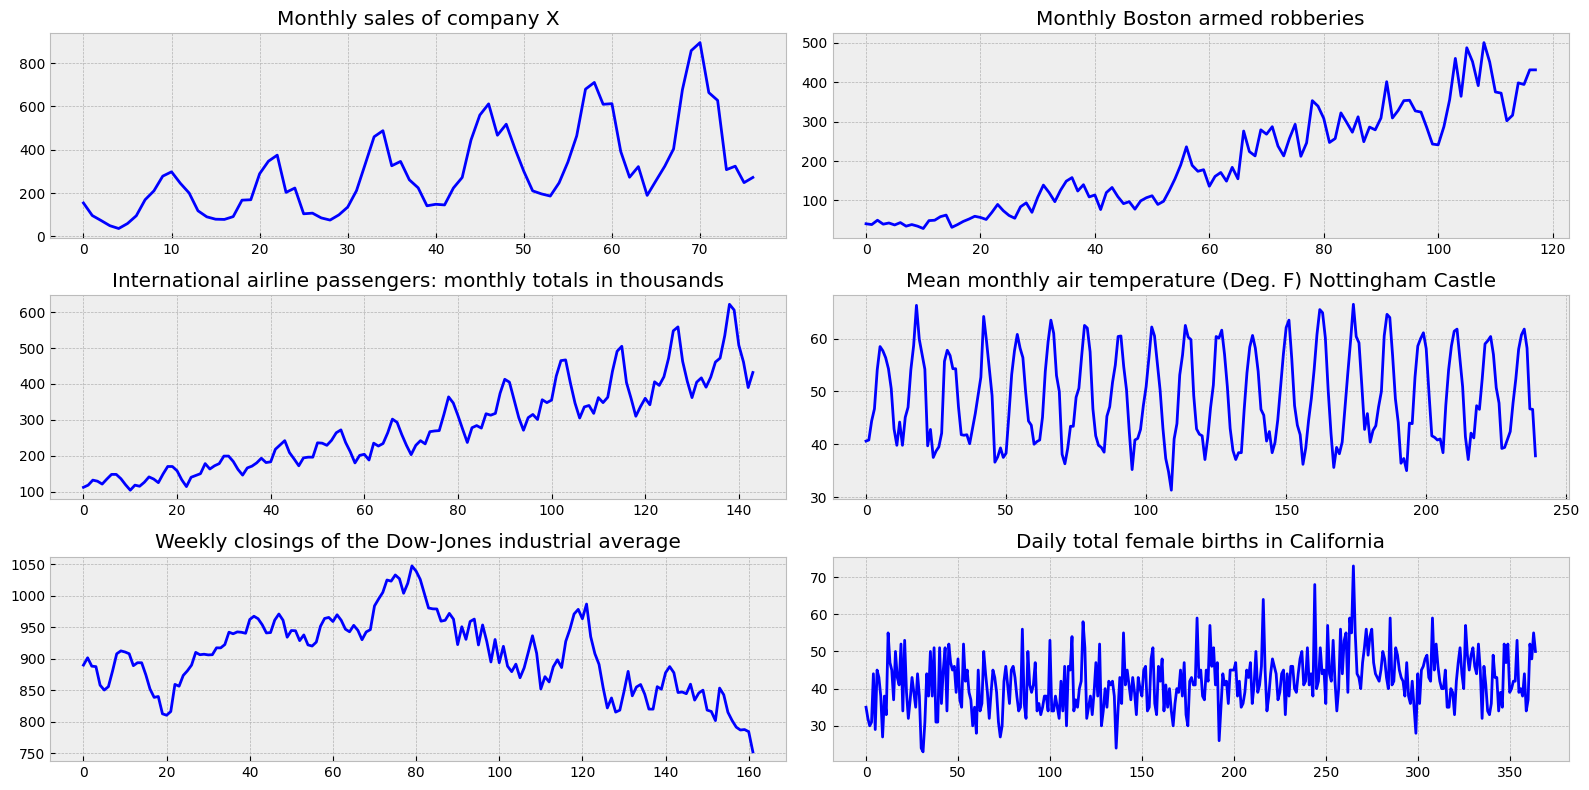

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

# 6_для daily-total-female-births-in-cal.csv


In [4]:
# Преобразование столбца 'Month' в формат datetime и установка его в качестве индекса
female_births['Date'] = pd.to_datetime(female_births['Date'])
female_births.set_index('Date', inplace=True)

# Проверка данных
print(female_births.head())

            Count
Date             
1959-01-01     35
1959-01-02     32
1959-01-03     30
1959-01-04     31
1959-01-05     44


In [5]:
### 1. Удаление тренда Для удаления тренда используем линейную регрессию:
# Удаление тренда с помощью линейной регрессии
X = np.arange(len(female_births)).reshape(-1, 1)
y = female_births['Count'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
detrended = female_births['Count'] - trend.flatten()

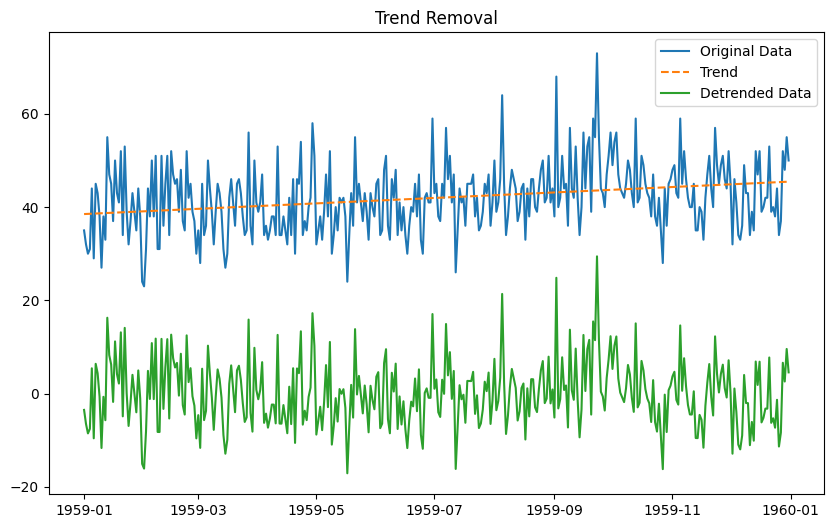

In [6]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(female_births.index, female_births['Count'], label='Original Data')
plt.plot(female_births.index, trend, label='Trend', linestyle='--')
plt.plot(female_births.index, detrended, label='Detrended Data')
plt.legend()
plt.title('Trend Removal')
plt.show()

In [12]:
# Проверка стационарности ряда с помощью теста Дики-Фуллера
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')

In [13]:
# Вывод начальных данных и проверка их стационарности
print("Проверка начальных данных на стационарность:")
test_stationarity(female_births['Count'])

Проверка начальных данных на стационарность:
ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values:
   1%, -3.448748905151901
Critical Values:
   5%, -2.8696473721448728
Critical Values:
   10%, -2.5710891239349585


In [14]:
# Дифференцирование временного ряда для достижения стационарности
female_births['Count_diff'] = female_births['Count'].diff().dropna()

# Проверка стационарности дифференцированного ряда
print("\nПроверка дифференцированных данных на стационарность:")
test_stationarity(female_births['Count_diff'].dropna())


Проверка дифференцированных данных на стационарность:
ADF Statistic: -12.62517863387136
p-value: 1.5472400091968453e-23
Critical Values:
   1%, -3.44880082033912
Critical Values:
   5%, -2.869670179576637
Critical Values:
   10%, -2.5711012838861036


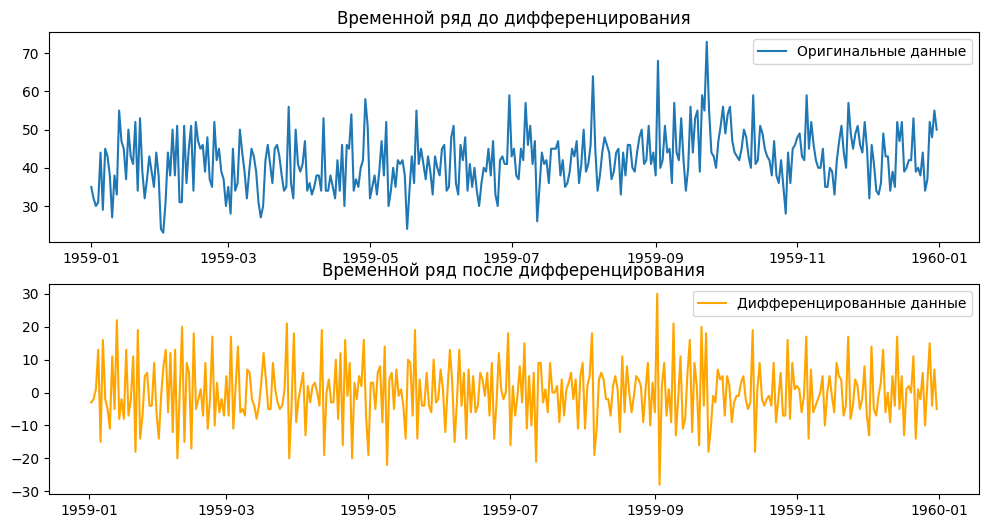

In [15]:
# Визуализация данных до и после дифференцирования
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(female_births['Count'], label='Оригинальные данные')
plt.title('Временной ряд до дифференцирования')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(female_births['Count_diff'], label='Дифференцированные данные', color='orange')
plt.title('Временной ряд после дифференцирования')
plt.legend()